step 0: mode = unknown
step 1: mode =  0.64
step 2: mode = 0.62
step 3: mode = 0.64
step 4: mode = 0.62


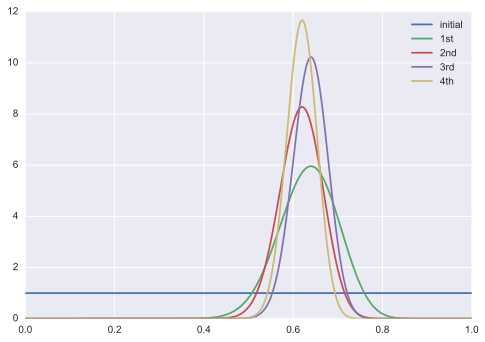

In [5]:
theta0 = 0.6
a0, b0 = 1, 1
print("step 0: mode = unknown")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a0,b0).pdf(xx), label="initial")

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a1, b1 = a0 + N1, b0 + N0
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), label="1st")
print("step 1: mode = ", (a1 - 1) /  (a1 + b1 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a2, b2 = a1 + N1, b1 + N0
plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), label="2nd");
print("step 2: mode =", (a2 - 1)/(a2 + b2 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a3, b3 = a2 + N1, b2 + N0
plt.plot(xx, sp.stats.beta(a3, b3).pdf(xx), label="3rd");
print("step 3: mode =", (a3 - 1)/(a3 + b3 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a4, b4 = a3 + N1, b3 + N0
plt.plot(xx, sp.stats.beta(a4, b4).pdf(xx), label="4th");
print("step 4: mode =", (a4 - 1)/(a4 + b4 - 2))

plt.legend()
plt.show()

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=["MEDV"])

In [21]:
df = pd.concat([dfX, dfY],axis=1)
df["MEDV"].mean()

22.532806324110698

In [22]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [24]:
from sklearn.datasets import load_diabetes

In [25]:
diabetes = load_diabetes()

In [28]:
diabetes.describe

AttributeError: describe

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

In [31]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [32]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


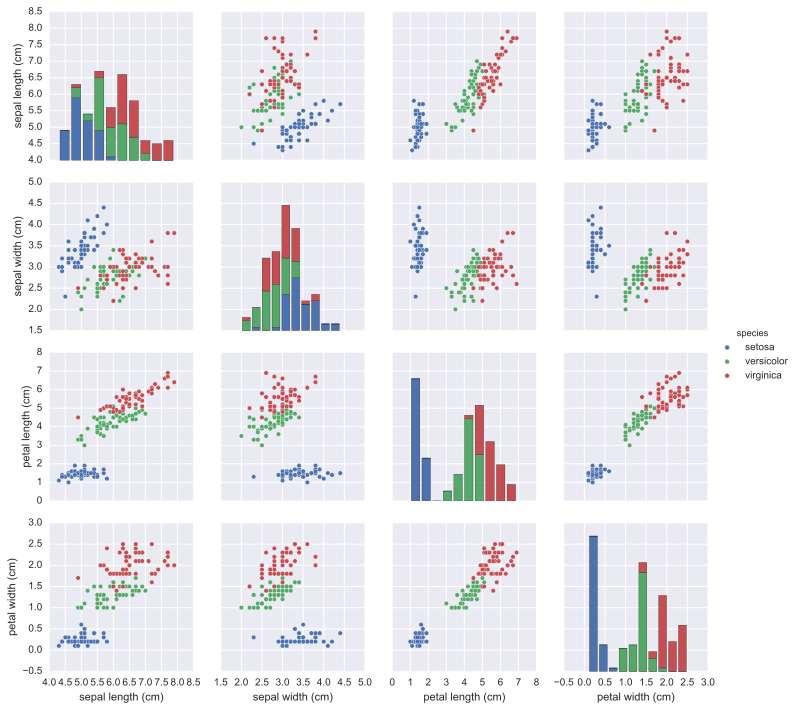

In [34]:
sns.pairplot(df, hue="species")
plt.show()

In [36]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')

In [45]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [46]:
from pprint import pprint
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [47]:
print(newsgroups.data[1])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   



In [48]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/dockeruser/scikit_learn_data


In [49]:
print(olivetti.DESCR)

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [50]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

IOError: [Errno socket error] [Errno 110] Connection timed out

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

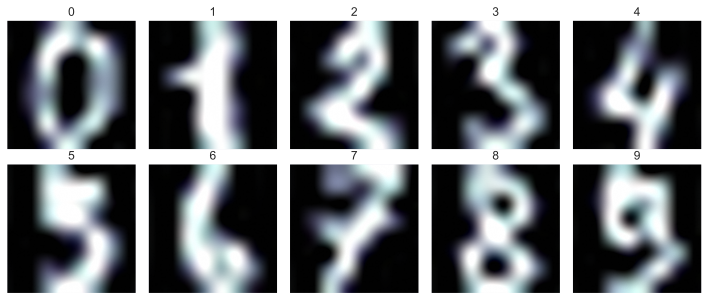

In [53]:
N=2; M=5;  # 두 로우, 5컬럼
fig = plt.figure(figsize=(10,5))   
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="spline36");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

In [56]:
ax.imshow?

In [57]:
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata('MNIST original')